pada kesempatan kali ini saya akan melakukan cleaning dengan methode : <br>
- outliers = z-score
- NaN Numerik = KNN
- NaN Kategori = Modus

In [31]:
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv ('climate_vs_flood.csv', header=0)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          6308 non-null   object 
 1   Tn            5996 non-null   float64
 2   Tx            6095 non-null   float64
 3   Tavg          6262 non-null   float64
 4   RH_avg        6256 non-null   float64
 5   RR            3993 non-null   float64
 6   ss            5049 non-null   float64
 7   ff_x          6286 non-null   float64
 8   ddd_x         6286 non-null   float64
 9   ff_avg        6215 non-null   float64
 10  ddd_car       6207 non-null   object 
 11  station_id    6308 non-null   int64  
 12  station_name  6308 non-null   object 
 13  region_name   6308 non-null   object 
 14  flood         6308 non-null   int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 739.3+ KB


In [14]:
df.columns

Index(['date', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car', 'station_id', 'station_name', 'region_name',
       'flood'],
      dtype='object')

In [67]:
num_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
cat_cols = ['ddd_car', 'region_name']
target = ['flood']

In [23]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tn      5996 non-null   float64
 1   Tx      6095 non-null   float64
 2   Tavg    6262 non-null   float64
 3   RH_avg  6256 non-null   float64
 4   RR      3993 non-null   float64
 5   ss      5049 non-null   float64
 6   ff_x    6286 non-null   float64
 7   ddd_x   6286 non-null   float64
 8   ff_avg  6215 non-null   float64
dtypes: float64(9)
memory usage: 443.7 KB


In [48]:
num_cols = df.iloc[:, 1:9]
num_cols

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x
0,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0
1,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0
2,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0
3,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0
4,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0
...,...,...,...,...,...,...,...,...
6303,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0
6304,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0
6305,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0
6306,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0


In [76]:
imputer = KNNImputer(n_neighbors=7, weights="uniform")
num_imputed = imputer.fit_transform(df[num_cols])
df_num_imputed = pd.DataFrame(num_imputed, columns=num_cols)

In [70]:
cat_imputed = df['ddd_car'].fillna(df['ddd_car'].mode()[0])

In [77]:
data_imputed = pd.concat([df[['date']], df_num_imputed, cat_imputed, df[['flood']]], axis=1)

In [79]:
data_imputed.isna().sum()

date       0
Tn         0
Tx         0
Tavg       0
RH_avg     0
RR         0
ss         0
ff_x       0
ddd_x      0
ff_avg     0
ddd_car    0
flood      0
dtype: int64

In [98]:
def handle_outliers_zscore(df_input, threshold=3):
    
    feature_list = df_input.columns[:]
    for feature in feature_list:
        z_scores = np.abs((df - df.mean()) / df.std())
        df_outliers = df.mask(z_scores > threshold)
    return df_outliers


In [130]:
df_noutlier = handle_outliers_zscore(data_imputed[num_cols])

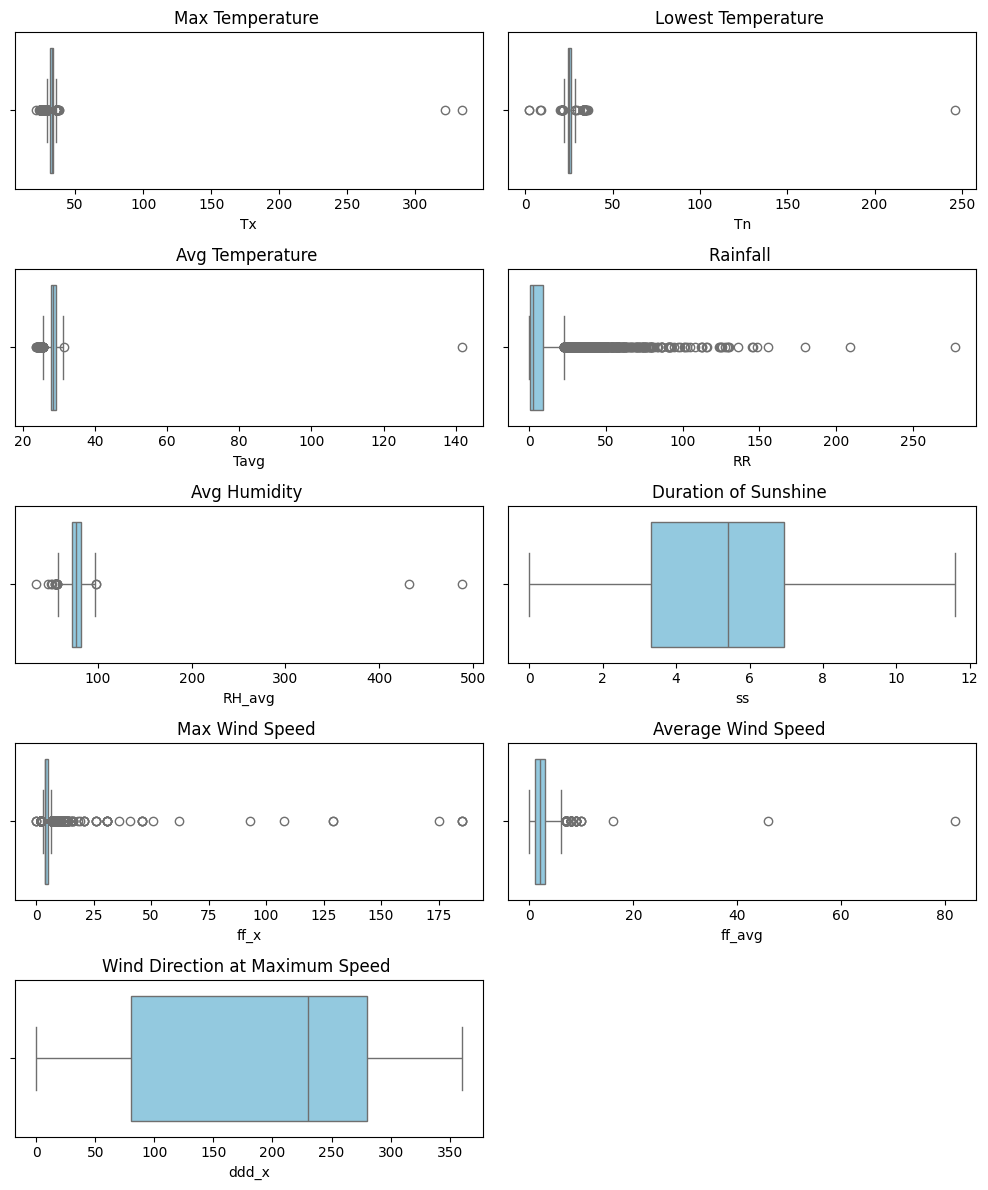

In [131]:
judul = {
    'Tx': 'Max Temperature ',
    'Tn': 'Lowest Temperature ',
    'Tavg': 'Avg Temperature ',
    'RR': 'Rainfall ',
    'RH_avg': 'Avg Humidity ',
    'ss': 'Duration of Sunshine ',
    'ff_x': 'Max Wind Speed ',
    'ff_avg': 'Average Wind Speed ',
    'ddd_x': 'Wind Direction at Maximum Speed '
}

fitur = ['Tx', 'Tn',  'Tavg', 'RR', 'RH_avg', 'ss', 'ff_x', 'ff_avg', 'ddd_x']

plt.figure(figsize=(10, 12))
n_cols = 2
n_rows = 5

# Membuat boxplot untuk setiap fitur menggunakan loop
for i, col in enumerate(fitur, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=col, data=data_imputed, color='skyblue')
    plt.title(f'{judul[col]}')  
    plt.ylabel('')

plt.tight_layout()
plt.show()

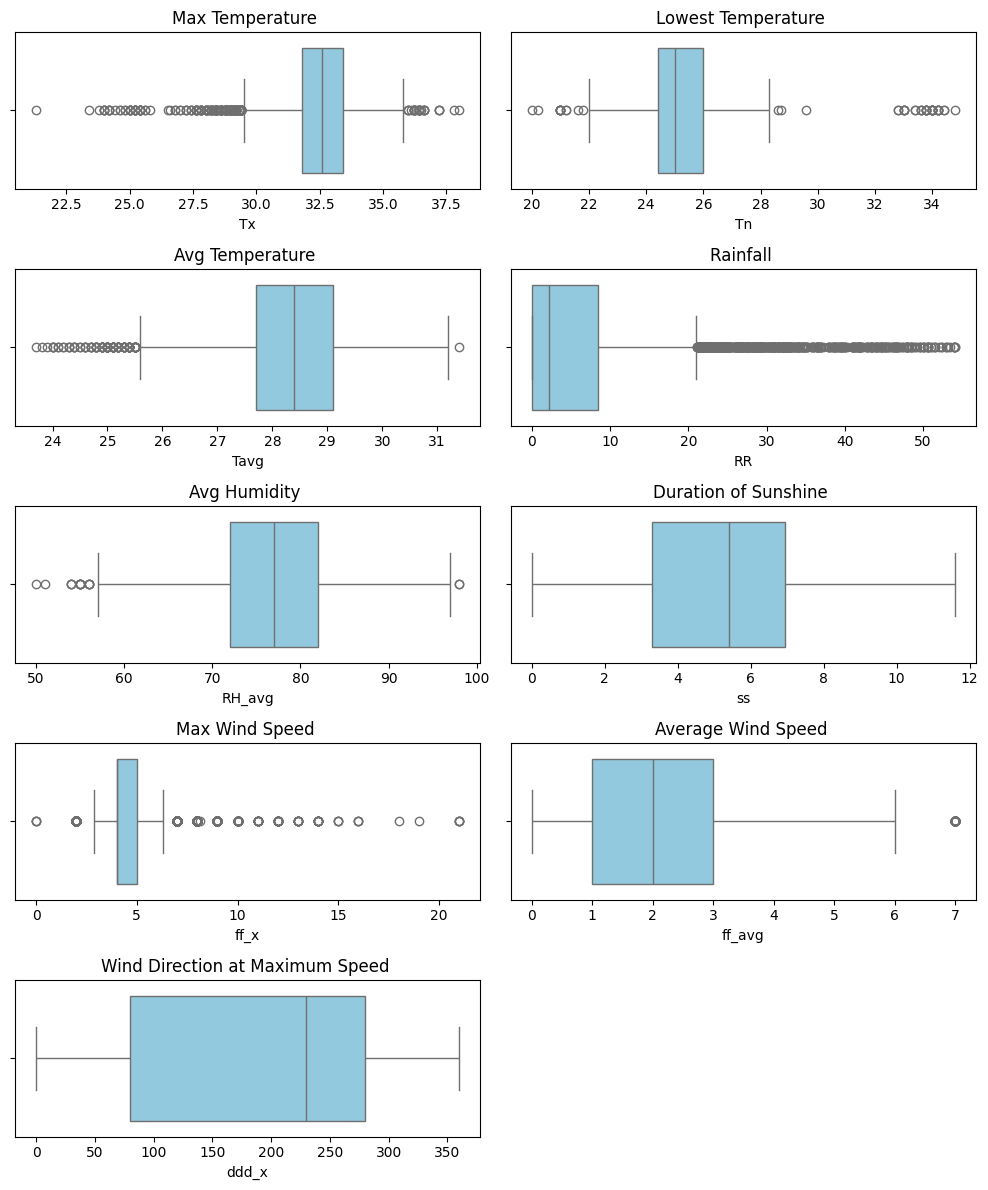

In [132]:
judul = {
    'Tx': 'Max Temperature ',
    'Tn': 'Lowest Temperature ',
    'Tavg': 'Avg Temperature ',
    'RR': 'Rainfall ',
    'RH_avg': 'Avg Humidity ',
    'ss': 'Duration of Sunshine ',
    'ff_x': 'Max Wind Speed ',
    'ff_avg': 'Average Wind Speed ',
    'ddd_x': 'Wind Direction at Maximum Speed '
}

fitur = ['Tx', 'Tn',  'Tavg', 'RR', 'RH_avg', 'ss', 'ff_x', 'ff_avg', 'ddd_x']

plt.figure(figsize=(10, 12))
n_cols = 2
n_rows = 5

# Membuat boxplot untuk setiap fitur menggunakan loop
for i, col in enumerate(fitur, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=col, data=df_noutlier, color='skyblue')
    plt.title(f'{judul[col]}')  
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [133]:
df_noutlier.isna().sum()

Tn          8
Tx          2
Tavg        1
RH_avg      4
RR        131
ss          0
ff_x       27
ddd_x       0
ff_avg     39
dtype: int64

In [135]:
df_noutlier

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
0,26.0,34.8,28.6,81.0,9.114286,5.800000,5.0,280.0,2.0
1,25.6,33.2,27.0,88.0,1.600000,8.700000,4.0,290.0,2.0
2,24.4,34.9,28.1,80.0,33.800000,5.400000,4.0,280.0,2.0
3,24.8,33.6,29.2,81.0,17.742857,6.600000,3.0,200.0,1.0
4,25.8,33.6,26.7,91.0,11.457143,3.200000,3.0,180.0,1.0
...,...,...,...,...,...,...,...,...,...
6303,23.8,32.0,28.0,70.0,15.571429,6.285714,12.0,180.0,5.0
6304,24.0,33.4,28.5,69.0,2.085714,4.914286,14.0,250.0,3.0
6305,25.2,33.4,28.7,70.0,5.300000,6.942857,14.0,120.0,5.0
6306,24.0,34.4,30.0,64.0,6.242857,5.742857,14.0,240.0,5.0


In [141]:
df_imputed_2 = imputer.fit_transform(df_noutlier)
df_num_imputed_2 = pd.DataFrame(df_imputed_2, columns=num_cols)

In [142]:
df_num_imputed_2.isna().sum()

Tn        0
Tx        0
Tavg      0
RH_avg    0
RR        0
ss        0
ff_x      0
ddd_x     0
ff_avg    0
dtype: int64

In [143]:
data_cleaned = pd.concat([df[['date']], df_num_imputed_2, cat_imputed, df[['flood']]], axis=1)

In [144]:
data_cleaned

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,flood
0,2016-01-01,26.0,34.8,28.6,81.0,9.114286,5.800000,5.0,280.0,2.0,S,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.600000,8.700000,4.0,290.0,2.0,W,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.800000,5.400000,4.0,280.0,2.0,SW,1
3,2016-01-04,24.8,33.6,29.2,81.0,17.742857,6.600000,3.0,200.0,1.0,S,0
4,2016-01-05,25.8,33.6,26.7,91.0,11.457143,3.200000,3.0,180.0,1.0,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,15.571429,6.285714,12.0,180.0,5.0,W,0
6304,2018-12-28,24.0,33.4,28.5,69.0,2.085714,4.914286,14.0,250.0,3.0,SE,0
6305,2018-12-29,25.2,33.4,28.7,70.0,5.300000,6.942857,14.0,120.0,5.0,SW,0
6306,2018-12-30,24.0,34.4,30.0,64.0,6.242857,5.742857,14.0,240.0,5.0,W,0


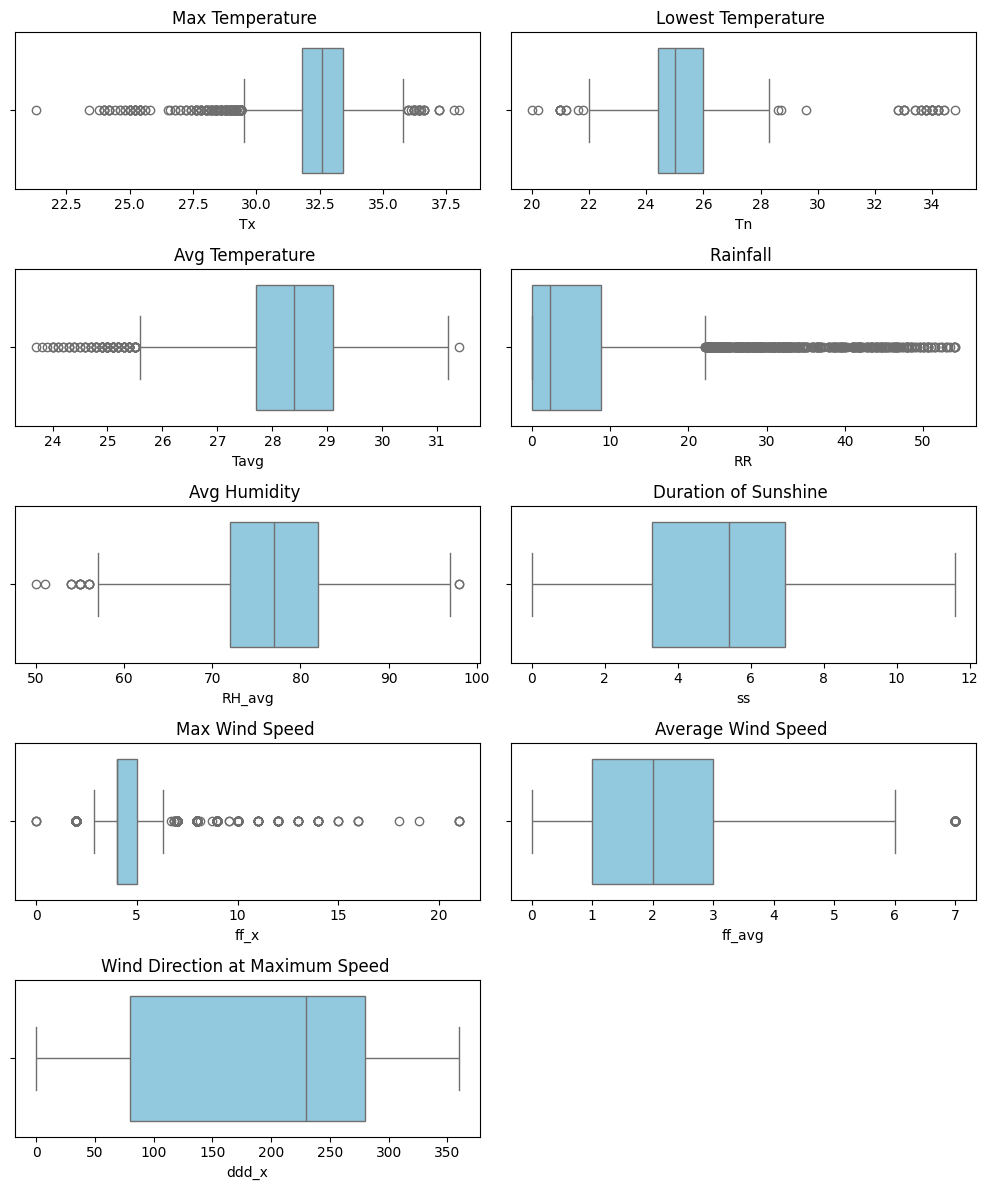

In [145]:
judul = {
    'Tx': 'Max Temperature ',
    'Tn': 'Lowest Temperature ',
    'Tavg': 'Avg Temperature ',
    'RR': 'Rainfall ',
    'RH_avg': 'Avg Humidity ',
    'ss': 'Duration of Sunshine ',
    'ff_x': 'Max Wind Speed ',
    'ff_avg': 'Average Wind Speed ',
    'ddd_x': 'Wind Direction at Maximum Speed '
}

fitur = ['Tx', 'Tn',  'Tavg', 'RR', 'RH_avg', 'ss', 'ff_x', 'ff_avg', 'ddd_x']

plt.figure(figsize=(10, 12))
n_cols = 2
n_rows = 5

# Membuat boxplot untuk setiap fitur menggunakan loop
for i, col in enumerate(fitur, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=col, data=data_cleaned, color='skyblue')
    plt.title(f'{judul[col]}')  
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [147]:
data_cleaned.to_csv('df_KNN_mode_zscore.csv')